In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
import seaborn as sns
import textwrap

In [68]:
# Load and merge clinical and preclinical data
clinical_LLM_df= pd.read_csv("Clinical_Students_LLM_perspectives_data.csv")
preclinical_LLM_df = pd.read_csv("Preclinical_Students_LLM_perspectives_data.csv")
merged_LLM_df = pd.merge(clinical_LLM_df, preclinical_LLM_df, how = 'outer', on="Response")
merged_LLM_df.columns


Index(['Column_x', 'Response', 'Count_x', 'Total Responses_x', 'Percentage_x',
       'Column_y', 'Count_y', 'Total Responses_y', 'Percentage_y'],
      dtype='object')

In [74]:
merged_clean = merged_LLM_df.drop(['Count_x','Total Responses_x', 'Column_y','Count_y', 'Total Responses_y'],
                                  axis=1, inplace=False)

merged_clean.columns = ['Question', 'Response', 'Clinical', 'Pre-clinical']
for col in ["Clinical", "Pre-clinical"]:
    merged_clean[col] = merged_clean[col].str.rstrip("%")   
    merged_clean[col] = pd.to_numeric(merged_clean[col])   

In [ ]:
# Frequency LLM
merged_LLM_freq = merged_clean.iloc[0:4, 1:4]

# Reordering for plot
order = ["A few times/rarely", "Daily", "Weekly", "Monthly"]
merged_LLM_freq["Response"] = pd.Categorical(merged_LLM_freq["Response"], categories=order, ordered=True)
merged_LLM_freq = merged_LLM_freq.sort_values("Response")


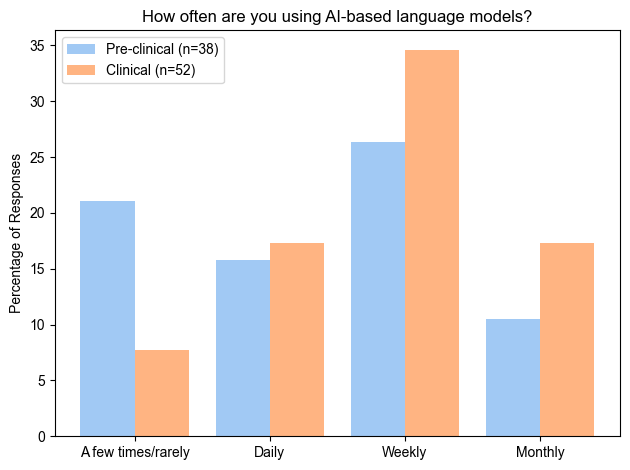

In [ ]:
# Plot LLM Freq 
sns.barplot
plt.rcParams['font.family'] = 'Arial'
sns.set_palette("pastel") # color palette

# Plot parameters
bar_width = 0.4
x = np.arange(len(merged_LLM_freq["Response"]))

# Plot dataframes
plt.bar(x - bar_width / 2, merged_LLM_freq["Pre-clinical"], width=bar_width, label="Pre-clinical (n=38)")
plt.bar(x + bar_width / 2, merged_LLM_freq["Clinical"], width=bar_width, label="Clinical (n=52)")

# Labels
plt.ylabel("Percentage of Responses")
plt.title("How often are you using AI-based language models?")
plt.xticks(x, merged_LLM_freq["Response"]) 
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [127]:
# LLM Perspectives: Accuracy & Editing
merged_LLM_accuracy = merged_clean.iloc[[41,42,43,84,85], 1:4]
merged_LLM_accuracy.fillna(0, inplace=True)

merged_LLM_edit = merged_clean.iloc[44:48, 1:4]

In [128]:
# Reordering responses for plot
order_acc = ["Extremely inaccurate (completely unusable)","Somewhat inaccurate (too many mistakes to use in most cases)",
         "Neither accurate nor inaccurate (a number of mistakes, but still useable)", "Somewhat accurate (a few mistakes)",
         "Extremely accurate (almost no mistakes)"]
merged_LLM_accuracy["Response"] = pd.Categorical(merged_LLM_accuracy["Response"], categories=order_acc, ordered=True)
merged_LLM_accuracy= merged_LLM_accuracy.sort_values("Response")

order_edit = ["No editing", "Minimal editing (less than 5 changes)", "Moderate editing (5-10 changes)",
              "Significant editing (greater than 10 changes)"]
merged_LLM_edit["Response"] = pd.Categorical(merged_LLM_edit["Response"], categories=order_edit, ordered=True)
merged_LLM_edit= merged_LLM_edit.sort_values("Response")


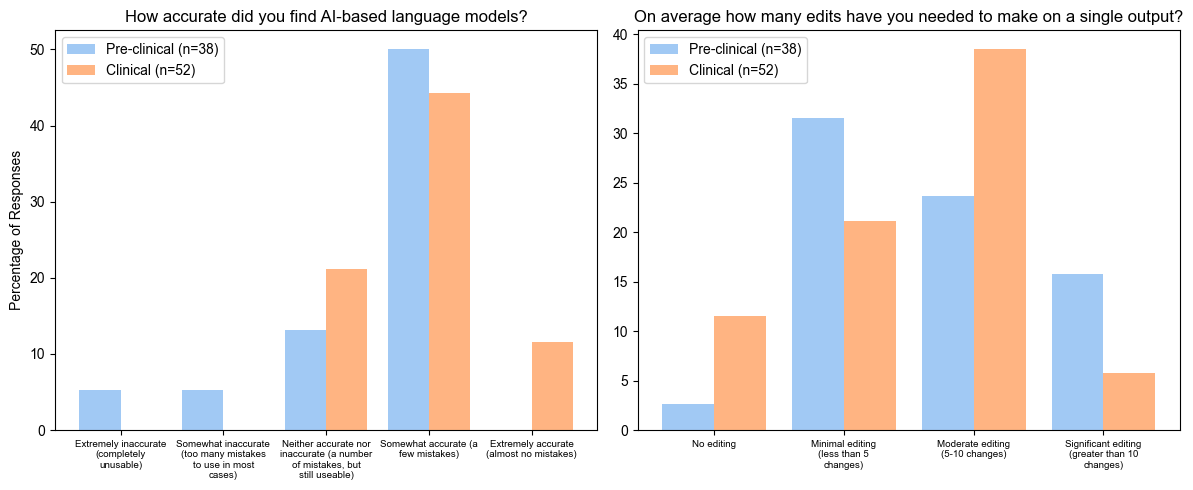

In [144]:
# Plot LLM Accuracy + Editing Perspectives
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plt.rcParams['font.family'] = 'Arial'
sns.set_palette("pastel") # color palette

# Plot Accuracy (1st subplot)
bar_width = 0.4
x = np.arange(len(merged_LLM_accuracy["Response"]))
axes[0].bar(x - bar_width / 2, merged_LLM_accuracy["Pre-clinical"], width=bar_width, label="Pre-clinical (n=38)")
axes[0].bar(x + bar_width / 2, merged_LLM_accuracy["Clinical"], width=bar_width, label="Clinical (n=52)")

axes[0].set_ylabel("Percentage of Responses")
axes[0].set_title("How accurate did you find AI-based language models?")
acc_labels = merged_LLM_accuracy["Response"]
axes[0].set_xticks(x, [textwrap.fill(label, 20) for label in acc_labels], fontsize = 7)
axes[0].legend()

# Plot Editing (2nd subplot)
bar_width = 0.4
x_e = np.arange(len(merged_LLM_edit["Response"]))
axes[1].bar(x_e - bar_width / 2, merged_LLM_edit["Pre-clinical"], width=bar_width, label="Pre-clinical (n=38)")
axes[1].bar(x_e + bar_width / 2, merged_LLM_edit["Clinical"], width=bar_width, label="Clinical (n=52)")

axes[1].set_title("On average how many edits have you needed to make on a single output?")
edit_labels = merged_LLM_edit["Response"]
axes[1].set_xticks(x_e, [textwrap.fill(label, 20) for label in edit_labels], fontsize = 7)
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


